In [1]:
import scanpy as sc
import anndata
import os
import fnmatch
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
#import scrublet as scr
import importlib
import sys
from harmony import harmonize
import seaborn as sns
from matplotlib import rcParams
import math
from scipy import stats
import seaborn as sns
import scipy as sp
import h5py
import warnings
import random
import math
import scvelo as scv
from matplotlib import rcParams
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

In [2]:
#Setting Scanpy figure parameters 
sc.settings.set_figure_params(dpi = 500, color_map = 'RdPu', dpi_save = 500)

In [2]:
adata_allcells = sc.read_h5ad("./adata_Final_for_Reinfection_publication.h5ad")
adata_allcells

AnnData object with n_obs × n_vars = 88360 × 25901
    obs: 'sample', 'DGE_name', 'monkey', 'array number', 'Sample Name', 'Sample type', 'Time point of sampling', 'Infusion before 2nd Mtb infection anti CD4 or IgG', 'Naïve or Primary Infection or Reinfection at sample time', 'Group', 'Group_Detailed', 'Drug Treatment', 'CFU Total ', 'Type of Mtb strain ', 'n_genes', 'n_counts', 'percent_mito', 'percent_ribo', 'percent_hbb', 'predicted_doublets', 'color', 'SubclusteringGroup', 'Subclustering', 'Doublet', 'leiden', 'leiden_lab_orig', 'Doublet_labels', 'Doublet_colors', 'Doublet_str', 'Doublet_int', 'CoarseClustering', 'SubclusteringV2'
    var: 'n_cells', 'Blacklist_Genes', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'CoarseClustering_colors', 'Doublet_colors_colors', 'Doublet_str_colors', 'Group_colors', 'SubclusteringV2_colors', 'Subclustering_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_lab_orig_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups

In [10]:
adata = sc.AnnData(adata_allcells.raw.X, obs=adata_allcells.obs, var=adata_allcells.raw.var, uns=adata_allcells.uns)
adata = adata[adata.obs['CoarseClustering'].isin(['Neutrophils']), :]
adata

View of AnnData object with n_obs × n_vars = 5250 × 26030
    obs: 'sample', 'DGE_name', 'monkey', 'array number', 'Sample Name', 'Sample type', 'Time point of sampling', 'Infusion before 2nd Mtb infection anti CD4 or IgG', 'Naïve or Primary Infection or Reinfection at sample time', 'Group', 'Group_Detailed', 'Drug Treatment', 'CFU Total ', 'Type of Mtb strain ', 'n_genes', 'n_counts', 'percent_mito', 'percent_ribo', 'percent_hbb', 'predicted_doublets', 'color', 'SubclusteringGroup', 'Subclustering', 'Doublet', 'leiden', 'leiden_lab_orig', 'Doublet_labels', 'Doublet_colors', 'Doublet_str', 'Doublet_int', 'CoarseClustering', 'SubclusteringV2'
    var: 'n_cells', 'Blacklist_Genes'
    uns: 'CoarseClustering_colors', 'Doublet_colors_colors', 'Doublet_str_colors', 'Group_colors', 'SubclusteringV2_colors', 'Subclustering_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_lab_orig_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'

In [11]:
adata.raw = adata.copy()
# keep blacklist genes from vars (they are stored in .raw so still accessible)
adata = adata[:,~adata.var['Blacklist_Genes']]
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
adata.var['highly_variable'].value_counts()
adata

/opt/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:523: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_n_counts] = counts_per_cell


/opt/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


AnnData object with n_obs × n_vars = 5250 × 25901
    obs: 'sample', 'DGE_name', 'monkey', 'array number', 'Sample Name', 'Sample type', 'Time point of sampling', 'Infusion before 2nd Mtb infection anti CD4 or IgG', 'Naïve or Primary Infection or Reinfection at sample time', 'Group', 'Group_Detailed', 'Drug Treatment', 'CFU Total ', 'Type of Mtb strain ', 'n_genes', 'n_counts', 'percent_mito', 'percent_ribo', 'percent_hbb', 'predicted_doublets', 'color', 'SubclusteringGroup', 'Subclustering', 'Doublet', 'leiden', 'leiden_lab_orig', 'Doublet_labels', 'Doublet_colors', 'Doublet_str', 'Doublet_int', 'CoarseClustering', 'SubclusteringV2'
    var: 'n_cells', 'Blacklist_Genes', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'CoarseClustering_colors', 'Doublet_colors_colors', 'Doublet_str_colors', 'Group_colors', 'SubclusteringV2_colors', 'Subclustering_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_lab_orig_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups'

In [7]:
adata

AnnData object with n_obs × n_vars = 5250 × 25901
    obs: 'sample', 'DGE_name', 'monkey', 'array number', 'Sample Name', 'Sample type', 'Time point of sampling', 'Infusion before 2nd Mtb infection anti CD4 or IgG', 'Naïve or Primary Infection or Reinfection at sample time', 'Group', 'Group_Detailed', 'Drug Treatment', 'CFU Total ', 'Type of Mtb strain ', 'n_genes', 'n_counts', 'percent_mito', 'percent_ribo', 'percent_hbb', 'predicted_doublets', 'color', 'SubclusteringGroup', 'Subclustering', 'Doublet', 'leiden', 'leiden_lab_orig', 'Doublet_labels', 'Doublet_colors', 'Doublet_str', 'Doublet_int', 'CoarseClustering', 'SubclusteringV2'
    var: 'n_cells', 'Blacklist_Genes', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'CoarseClustering_colors', 'Doublet_colors_colors', 'Doublet_str_colors', 'Group_colors', 'SubclusteringV2_colors', 'Subclustering_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_lab_orig_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups'

# 1. Dimenionality Reduction etc

In [13]:
list(set(adata.obs.Subclustering))

['ICAM1$^{hi}$, NBN$^{hi}$ Neutrophils',
 'SORL1$^{hi}$, CFD$^{hi}$  Neutrophils']

In [ ]:
sc.tl.pca(adata, svd_solver = 'arpack', random_state = 18,use_highly_variable=True)
sc.pl.pca(adata, components=['1,2', '3,4'], color=['Group',"CXCL9","IDO1"],
          ncols=4, use_raw=True)
sc.pl.pca_loadings(adata, components=[1,2,3,4])
sc.pl.pca_variance_ratio(adata, log=True)

In [ ]:
sc.pp.neighbors(adata, n_neighbors=40, n_pcs=7, random_state = 18)
sc.tl.umap(adata, min_dist = 0.1, spread = 2, random_state = 18)
sc.pl.umap(adata, color = ["Group"])

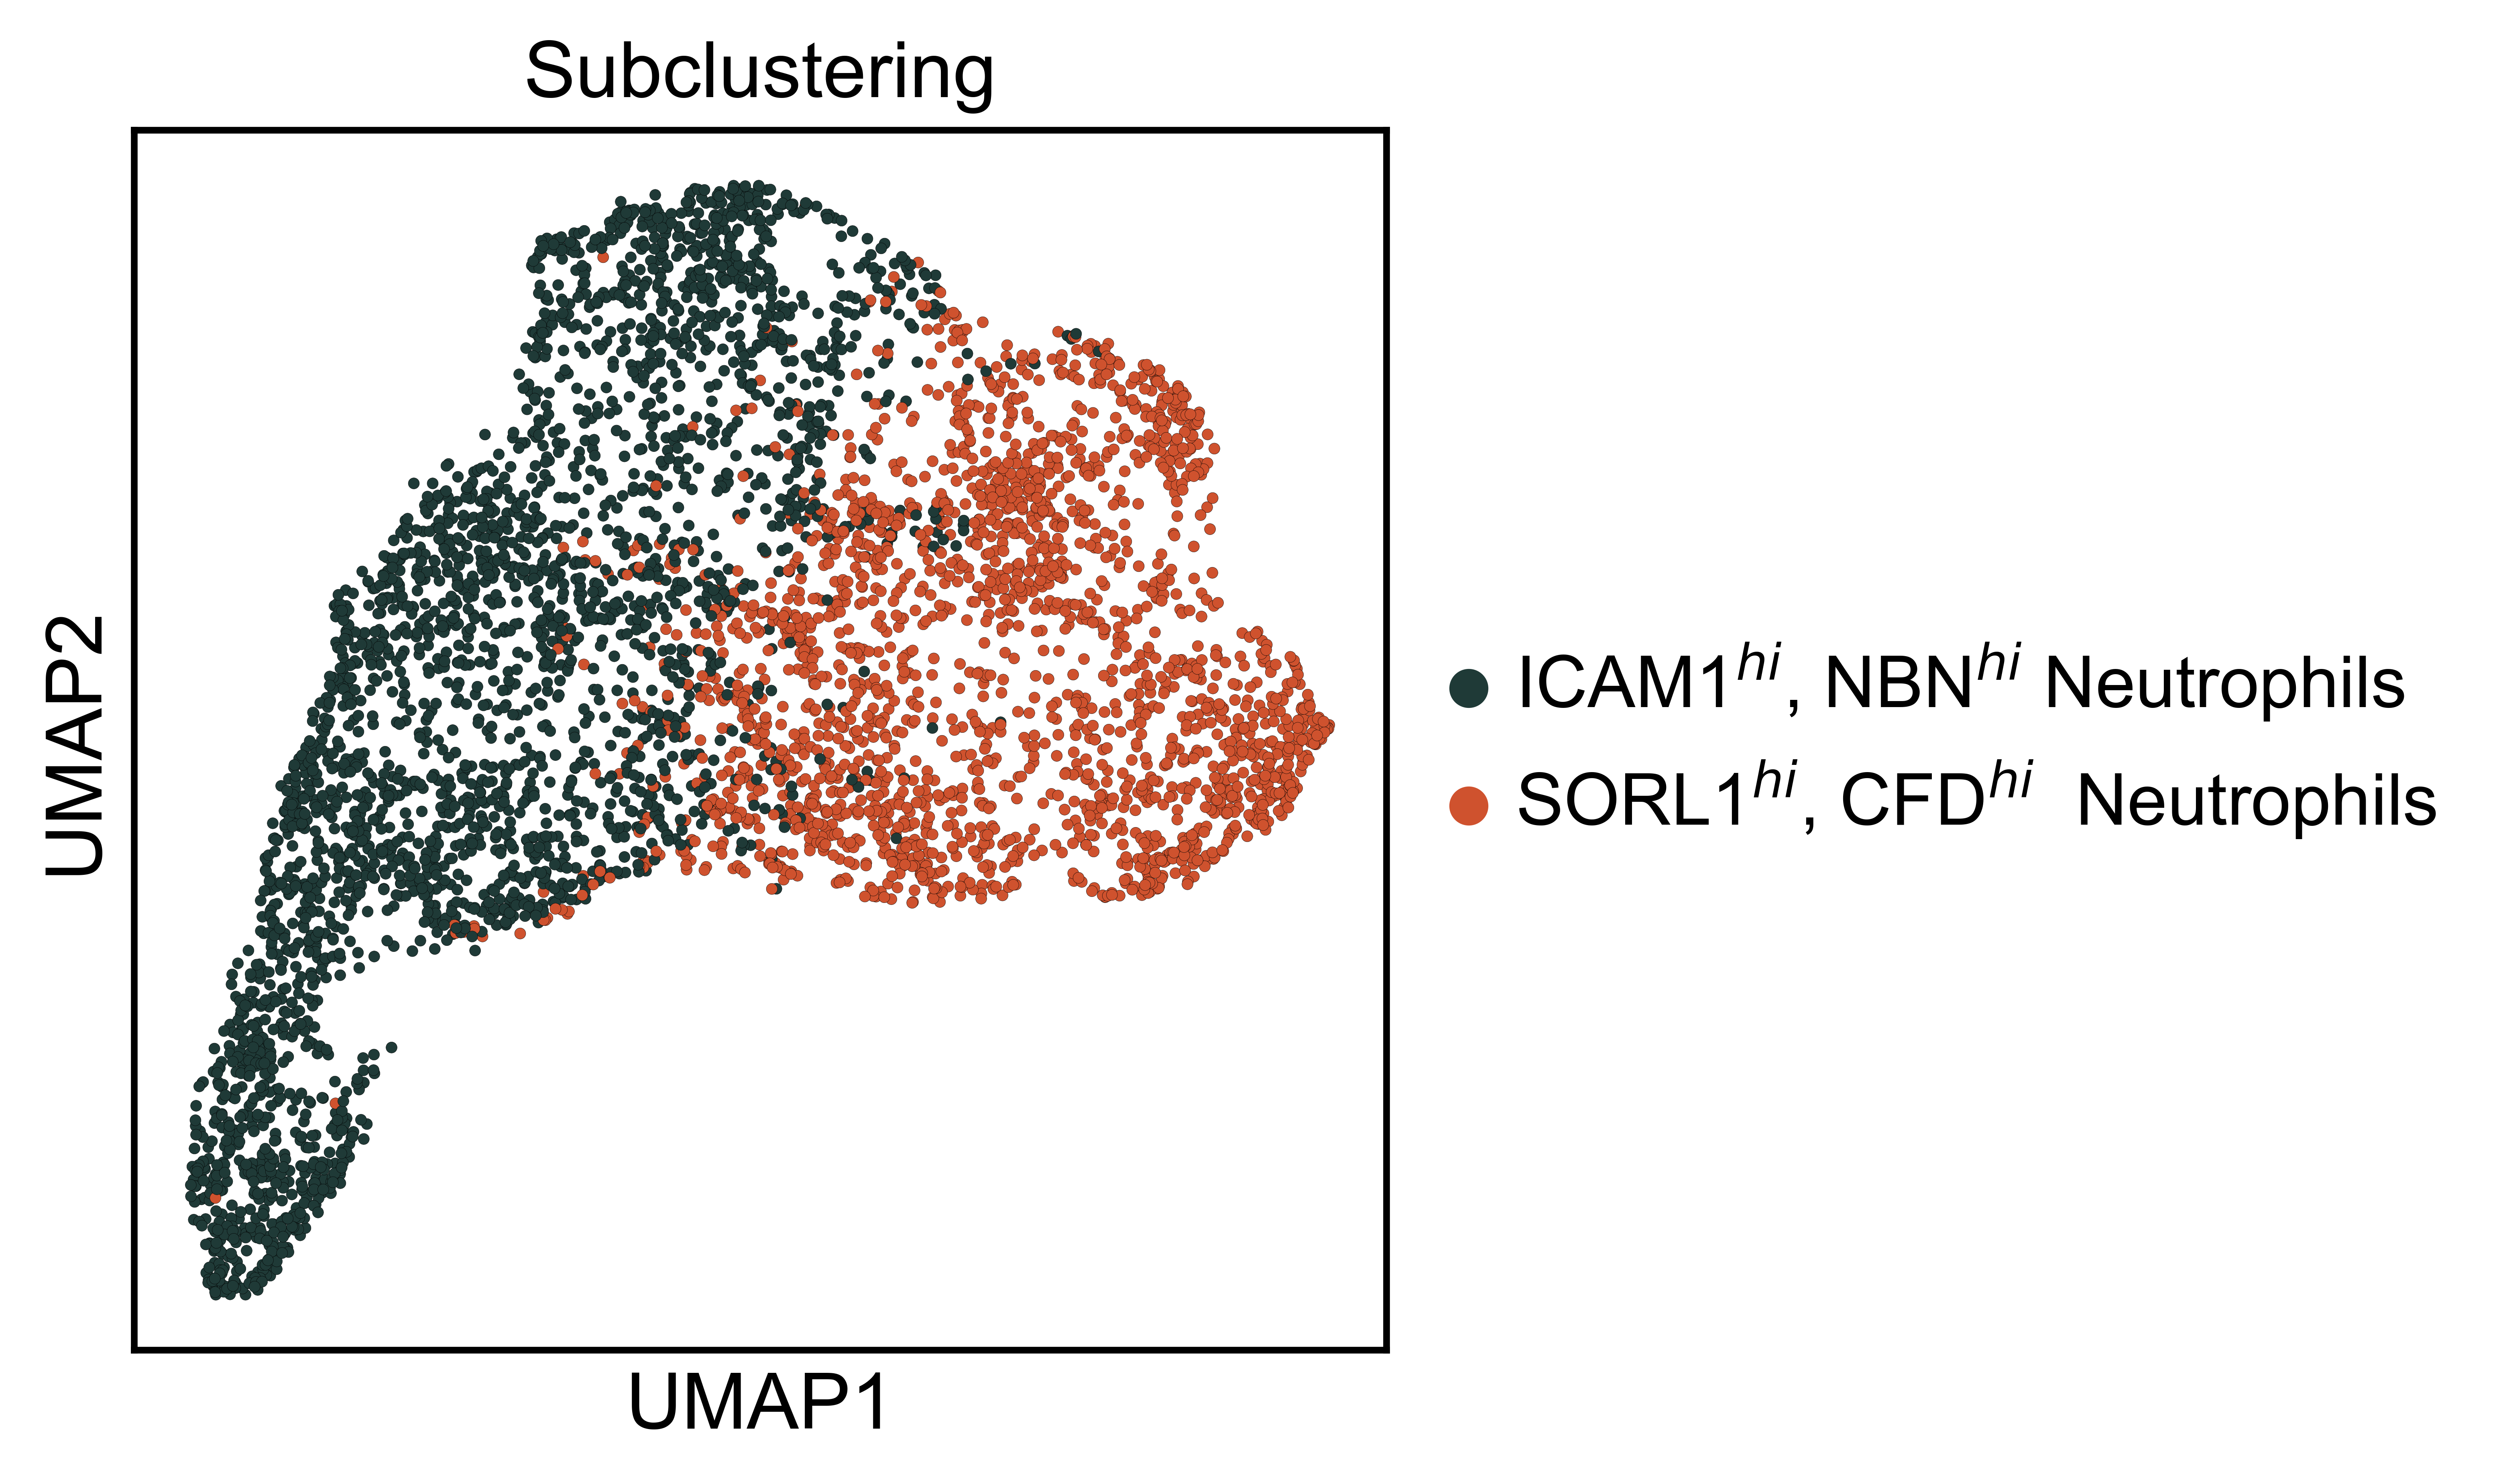

In [17]:
sc.pl.umap(adata, color=['Subclustering'],use_raw=True,edgecolor='k', linewidth=.05,size=16,save="Main_Figure_6A.png")

/var/folders/9z/kgyvt2qj1ws7gpsg6llgw1dw0000gn/T/ipykernel_48277/1746530218.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_df['count'] = 1
/var/folders/9z/kgyvt2qj1ws7gpsg6llgw1dw0000gn/T/ipykernel_48277/1746530218.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_df_all = adata_df.groupby([cell_types_column, sample_column, group_column]).count().reset_index()
/var/folders/9z/kgyvt2qj1ws7gpsg6llgw1dw0000gn/T/ipykernel_48277/1746530218.py:21: FutureWarning: The default value of observed=False is deprecated and will change to observed=True

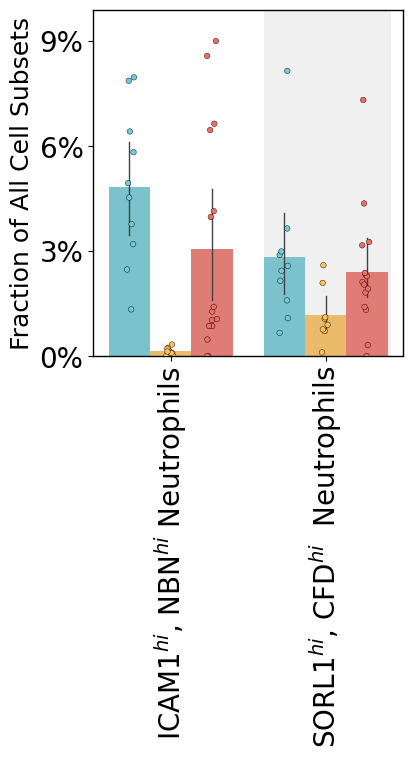

In [33]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
import scanpy as sc

cell_types = list(set(adata_allcells.obs.SubclusteringV2))
cell_types_column = 'SubclusteringV2'
sample_column = 'array number'
group_column = 'Group'

adata_df = adata_allcells.obs[[cell_types_column, sample_column, group_column]]
adata_df['count'] = 1


pivot_df_all = adata_df.groupby([cell_types_column, sample_column, group_column]).count().reset_index()
pivot_df_all = pivot_df_all.pivot_table(index=[sample_column, group_column], columns=cell_types_column, values='count', fill_value=0)
pivot_df_all.columns = pivot_df_all.columns.get_level_values(0)
pivot_df_all = pivot_df_all.apply(pd.to_numeric, errors='ignore')

fraction_df = pivot_df_all.div(pivot_df_all[cell_types].sum(axis=1), axis=0)
fraction_df[sample_column] = pivot_df_all.index.get_level_values(sample_column)
fraction_df[group_column] = pivot_df_all.index.get_level_values(group_column)

# Define cell subsets
t_cell_subsets = [
        'ICAM1$^{hi}$, NBN$^{hi}$ Neutrophils',
 'SORL1$^{hi}$, CFD$^{hi}$  Neutrophils']
# Create dataframe for cell types
fraction_df_t_cells = fraction_df[t_cell_subsets + [sample_column, group_column]]
df_t_cells = pd.melt(fraction_df_t_cells, id_vars=[sample_column, group_column], value_vars=t_cell_subsets, var_name='cell', value_name='prop')

# Define pairs for statistical comparison
unique_groups_per_cell = {
    cell_type: df_t_cells[df_t_cells['cell'] == cell_type]['Group'].cat.categories.tolist()
    for cell_type in t_cell_subsets
}

pairs_t_cells = []
for cell_type in t_cell_subsets:
    groups = unique_groups_per_cell[cell_type]
    if 'Naïve' in groups and 'IgG' in groups:
        pairs_t_cells.append([(cell_type, 'Naïve'), (cell_type, 'IgG')])
    if 'antiCD4' in groups and 'IgG' in groups:
        pairs_t_cells.append([(cell_type, 'antiCD4'), (cell_type, 'IgG')])


plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.


fig, ax = plt.subplots(figsize=(4, 4.5))
hue_order_Gran = ['Naïve', 'IgG', 'antiCD4']

fg = sns.barplot(x='cell', y='prop', hue=df_t_cells["Group"], data=df_t_cells, palette=reinfection_palette, hue_order=hue_order_Gran, errwidth=1)
fg = sns.stripplot(x='cell', y='prop', hue=df_t_cells["Group"], data=df_t_cells, hue_order=hue_order_Gran,
            edgecolor='k',
            size=4,
            dodge=True,
            linewidth=.3,
            palette=reinfection_palette,
            ax=fg,
            )

y_max = df_t_cells['prop'].max()

ax.set_ylim(0, y_max * 1.1)  

num_ticks = 4
y_ticks = np.linspace(0, y_max, num_ticks)
ax.set_yticks(y_ticks)

ax.set_yticklabels([f"{x:.0%}" for x in y_ticks])

for pi in range(1, len(t_cell_subsets), 2):
    ax.add_patch(patches.Rectangle((pi * 1 - 0.4, -.2), .82, 1.2, facecolor="#f0f0f0", edgecolor='none', zorder=-20))

plt.xticks(rotation=90, fontsize=20)
plt.grid(False)
plt.xlabel(None)
plt.ylabel('Fraction of All Cell Subsets', fontsize=18)
plt.yticks(fontsize=20)
plt.legend().remove()
fg.set_title("", fontsize=20)

# Calculate p-values and add annotations
y_offset = 0.02 
x_offset_naive_igg = -0.13 
x_offset_antecd4_igg = 0.13  

p_value_y_position_naive_igg = y_max * 1.05
p_value_y_position_antecd4_igg = y_max * 1.08

for idx, pair in enumerate(pairs_t_cells):
    data1 = df_t_cells[(df_t_cells['cell'] == pair[0][0]) & (df_t_cells['Group'] == pair[0][1])]['prop'].dropna()
    data2 = df_t_cells[(df_t_cells['cell'] == pair[1][0]) & (df_t_cells['Group'] == pair[1][1])]['prop'].dropna()
    _, p_val = mannwhitneyu(data1, data2)

    if pd.isna(p_val):
        continue

    x1 = t_cell_subsets.index(pair[0][0])
    x2 = t_cell_subsets.index(pair[1][0])

    if pair[0][1] == 'Naïve' and pair[1][1] == 'IgG':
        x_position = x1 + (x2 - x1) / 2 + x_offset_naive_igg
        y_position = p_value_y_position_naive_igg
    elif pair[0][1] == 'antiCD4' and pair[1][1] == 'IgG':
        x_position = x1 + (x2 - x1) / 2 + x_offset_antecd4_igg
        y_position = p_value_y_position_antecd4_igg
    else:
        x_position = x1 + (x2 - x1) / 2
        y_position = p_value_y_position_naive_igg 

    if p_val < 0.05:
        p_value_text = f"p={p_val:.4f}"
    else:
        p_value_text = "ns"

    #  to add p-value annotations
    # ax.annotate(p_value_text, xy=(x_position, y_position), ha='center', fontsize=7)

plt.savefig('Figure6_Neutrophil_Fraction.png', bbox_inches="tight", dpi=1000, transparent=True)
plt.show()

# Figure 5C,D pseudobulk log2CPM per granuloma (all neutrophils)

In [18]:
def extract_pseudobulk_log2CPM(adata, group_by_col='sample_id', subset=None):
    # subset function: "gate" on CD4+ or CD8+ T cells (similar to Flow cyto)
    if subset:
        if subset == "CD4+":
            adata = adata[adata[:, 'CD4'].X > 0, :]
        elif subset == "CD8A-":
            adata = adata[adata[:, 'CD8A'].X <= 0, :]
        elif subset == "CD8A+":
            adata = adata[adata[:, 'CD8A'].X > 0, :]
        elif subset == "CD4-":
            adata = adata[adata[:, 'CD4'].X <= 0, :]
    
    # convert to df using raw data if available
    if adata.raw:
        df = pd.DataFrame(adata.raw.X.toarray(), columns=adata.raw.var_names, index=adata.obs_names)
    else:
        df = pd.DataFrame(adata.X.toarray(), columns=adata.var_names, index=adata.obs_names)
    
    df[group_by_col] = adata.obs[group_by_col].values
    df['Group'] = adata.obs['Group'].values

    # aggregate counts by sample and group
    aggregated_counts = df.groupby([group_by_col, 'Group']).sum().reset_index()
    
    # calculate log2(CPM+1)
    total_counts_per_sample = aggregated_counts.iloc[:, 2:].sum(axis=1).to_numpy()  # Skip the first two columns
    cpm = (aggregated_counts.iloc[:, 2:] / total_counts_per_sample[:, None]) * 1e6
    log2cpm = np.log2(cpm + 1)
    
    log2cpm[group_by_col] = aggregated_counts[group_by_col]
    log2cpm['Group'] = aggregated_counts['Group']
    
    return log2cpm

def filter_genes_log2cpm(log2cpm_df, genes_list, group_by_col):
    # keep specified genes, along with 'Group' and group_by_col
    filtered_log2cpm = log2cpm_df[genes_list + ['Group', group_by_col]]
    return filtered_log2cpm

In [19]:
genes = ["CXCL8",'CXCL9',"CXCL10","CXCL11","CXCL16","IL1R1", "IL1R2", "CXCR1", "CXCR2", "CXCR4","CCL3","SERPINB1","TNF", "IL6R",
              "CASP1", "NFAM1", "IFNGR1", "NLRP3", "STAT1", "STAT3", "NFKBIA",
             "FCGR2B", "CD177", "LTF", "MMP9",
              "PADI4",
             "CD63", "LAMP2"]
# extract pseudobulk log2CPM values
all_log2cpm_values = extract_pseudobulk_log2CPM(adata, group_by_col='array number')
# Filter log2CPM values for the genes of interest
filtered_log2cpm_values = filter_genes_log2cpm(all_log2cpm_values, genes, group_by_col='array number')
filtered_log2cpm_values


/var/folders/9z/kgyvt2qj1ws7gpsg6llgw1dw0000gn/T/ipykernel_48277/38601485.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_counts = df.groupby([group_by_col, 'Group']).sum().reset_index()


CXCL8     CXCL9    CXCL10    CXCL11    CXCL16     IL1R1      IL1R2  \
0   13.056739  0.000000  0.000000  0.000000  7.241705  8.236931  10.555028   
1         NaN       NaN       NaN       NaN       NaN       NaN        NaN   
2         NaN       NaN       NaN       NaN       NaN       NaN        NaN   
3   13.925830  3.313777  9.448335  4.239347  6.759209  9.372498  11.019542   
4         NaN       NaN       NaN       NaN       NaN       NaN        NaN   
..        ...       ...       ...       ...       ...       ...        ...   
91        NaN       NaN       NaN       NaN       NaN       NaN        NaN   
92  13.073932  5.940510  7.670169  4.487836  5.635797  8.234215   9.259605   
93        NaN       NaN       NaN       NaN       NaN       NaN        NaN   
94        NaN       NaN       NaN       NaN       NaN       NaN        NaN   
95  13.506534  3.970341  8.493950  3.585662  6.143711  7.989445   9.462242   

       CXCR1     CXCR2     CXCR4  ...     NFKBIA     FCGR2B     CD177  \
0   8.458640  9.555987  9.603231  ...  11.807452  11.932950  6.980576   
1        NaN       NaN       NaN  ...        NaN        NaN       NaN   
2        NaN       NaN       NaN  ...        NaN        NaN       NaN   
3   9.701758  9.555102  7.691424  ...  12.833489  12.103708  7.339725   
4        NaN       NaN       NaN  ...        NaN        NaN       NaN   
..       ...       ...       ...  ...        ...        ...       ...   
91       NaN       NaN       NaN  ...        NaN        NaN       NaN   
92  9.695689  9.915409  9.991952  ...  12.650667  11.367252  9.806591   
93       NaN       NaN       NaN  ...        NaN        NaN       NaN   
94       NaN       NaN       NaN  ...        NaN        NaN       NaN   
95  9.278437  9.235180  9.295383  ...  13.555272  11.197775  9.899112   

         LTF       MMP9     PADI4      CD63      LAMP2    Group   array number  
0   0.000000   8.236931  5.675682  8.898133   9.818702      IgG   12518_Array2  
1        NaN        NaN       NaN       NaN        NaN    Naïve   12518_Array2  
2        NaN        NaN       NaN       NaN        NaN  antiCD4   12518_Array2  
3   3.313777  10.519401  7.867497  8.253065  10.438031      IgG   12518_Array3  
4        NaN        NaN       NaN       NaN        NaN    Naïve   12518_Array3  
..       ...        ...       ...       ...        ...      ...            ...  
91       NaN        NaN       NaN       NaN        NaN    Naïve  14218_Array11  
92  0.000000  10.510513  9.084230  6.438788   9.803448  antiCD4  14218_Array11  
93       NaN        NaN       NaN       NaN        NaN      IgG  14218_Array12  
94       NaN        NaN       NaN       NaN        NaN    Naïve  14218_Array12  
95  9.097038  10.593843  9.208590  7.610554   9.783761  antiCD4  14218_Array12  

[96 rows x 30 columns]

In [20]:
print("Unique groups in the pseudobulk matrix:")
print(filtered_log2cpm_values['Group'].unique())

Unique groups in the pseudobulk matrix:
['IgG', 'Naïve', 'antiCD4']
Categories (3, object): ['IgG', 'Naïve', 'antiCD4']


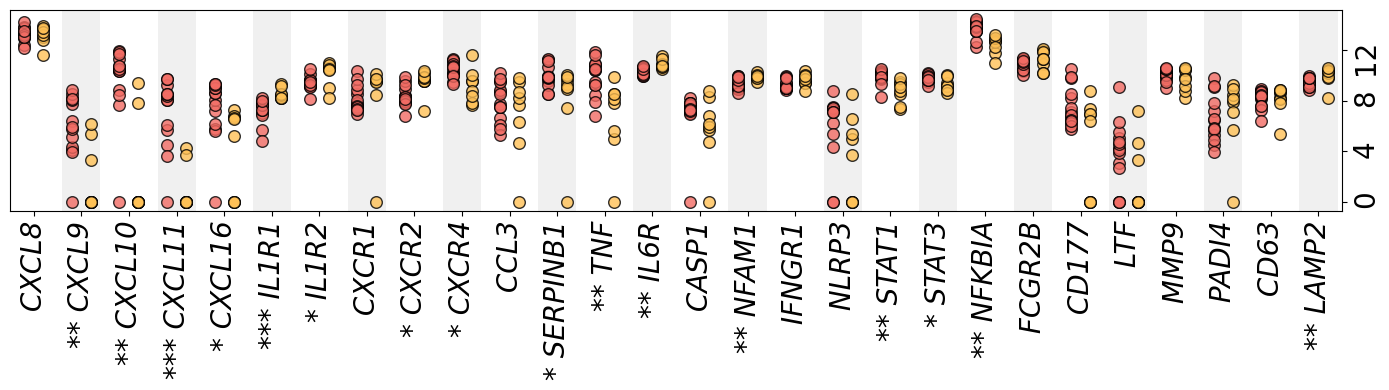

P-values:
CXCL8: 0.945585
CXCL9: 0.005706
CXCL10: 0.001337
CXCL11: 0.000825
CXCL16: 0.012731
IL1R1: 0.000228
IL1R2: 0.047780
CXCR1: 0.055996
CXCR2: 0.014007
CXCR4: 0.016902
CCL3: 0.632816
SERPINB1: 0.034360
TNF: 0.005136
IL6R: 0.001337
CASP1: 0.124617
NFAM1: 0.005136
IFNGR1: 0.055996
NLRP3: 0.065356
STAT1: 0.001692
STAT3: 0.028957
NFKBIA: 0.002131
FCGR2B: 0.219243
CD177: 0.172238
LTF: 0.142260
MMP9: 0.305937
PADI4: 0.305937
CD63: 0.837762
LAMP2: 0.007771


In [22]:
from scipy.stats import ranksums
import matplotlib.patches as patches
def plot_strip_log2cpm(log2cpm_df, genes_list, group_col, save=None):
    fig, ax = plt.subplots(figsize=(14, 4))
    
    dodge = 0.2  
    stars = []  
    p_values = {}
    
    for idx, gene in enumerate(genes_list):
        anticd4_vals = log2cpm_df.loc[log2cpm_df[group_col] == "antiCD4", gene].dropna().values
        igg_vals = log2cpm_df.loc[log2cpm_df[group_col] == "IgG", gene].dropna().values
        
        ax.scatter([idx - dodge]*len(anticd4_vals), anticd4_vals, color=reinfection_palette["antiCD4"], s=70, edgecolors='black', alpha=0.8)
        ax.scatter([idx + dodge]*len(igg_vals), igg_vals, color=reinfection_palette["IgG"], s=70, edgecolors='black', alpha=0.8)
        
        # Wilcoxon rank-sum test
        _, p_value = ranksums(anticd4_vals, igg_vals)
        p_values[gene] = p_value
        
        # define significance levels/what will be annotated on fig
        if p_value < 0.001:
            stars.append("***")
        elif p_value < 0.01:
            stars.append("**")
        elif p_value < 0.05:
            stars.append("*")
        else:
            stars.append("")
    
    for idx in range(1, len(genes_list), 2):
        ax.add_patch(patches.Rectangle((idx-0.4, ax.get_ylim()[0]), 0.8, ax.get_ylim()[1] - ax.get_ylim()[0], facecolor="#f0f0f0", edgecolor='none', zorder=-20))
    
    ax.grid(False)  
    ax.set_xlim(-0.5, len(genes_list)-0.5)  
    ax.set_xticks(range(len(genes_list)))
    ax.set_xticklabels([f"{star} {gene}" for star, gene in zip(stars, genes_list)], rotation=90, fontstyle='italic')
    plt.xticks(fontsize=20)
    
    y_min, y_max = ax.get_ylim()
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))
    
    ax.yaxis.tick_right()
    ax.yaxis.set_tick_params(rotation=90)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    
    if save:
        plt.savefig(save, dpi=1000, bbox_inches='tight', transparent=True)
    plt.show()
    
    # Print p-values
    print("P-values:")
    for gene, p_value in p_values.items():
        print(f"{gene}: {p_value:.6f}")
    
    return p_values

p_values = plot_strip_log2cpm(filtered_log2cpm_values, genes, 'Group', save="./Figure6/Neut_aCD4_IgG_CPM_StripPlot_genes_for_Publication.png")

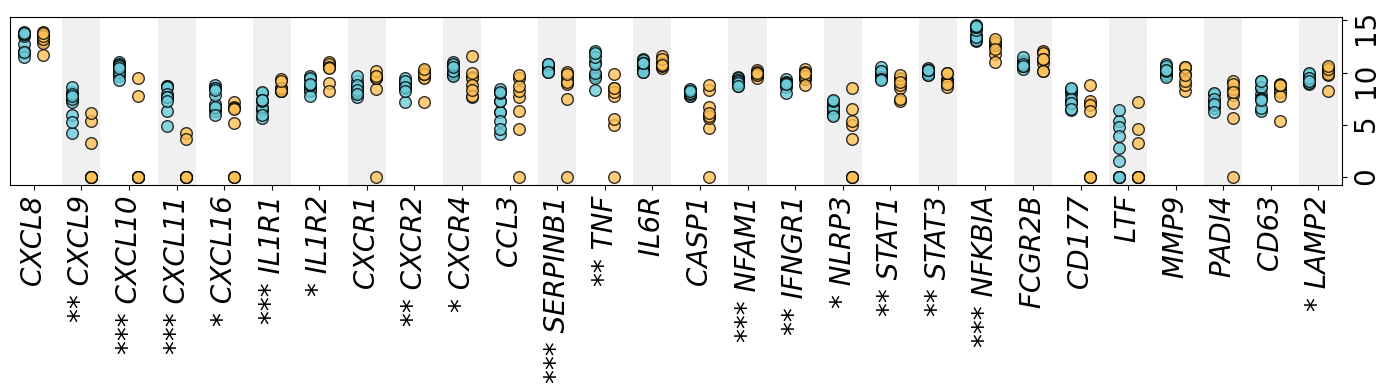

P-values:
CXCL8: 0.477197
CXCL9: 0.001872
CXCL10: 0.000530
CXCL11: 0.000379
CXCL16: 0.020879
IL1R1: 0.000379
IL1R2: 0.012851
CXCR1: 0.050612
CXCR2: 0.005880
CXCR4: 0.020879
CCL3: 0.286321
SERPINB1: 0.000379
TNF: 0.002520
IL6R: 0.328383
CASP1: 0.050612
NFAM1: 0.000734
IFNGR1: 0.004465
NLRP3: 0.020879
STAT1: 0.004465
STAT3: 0.005880
NFKBIA: 0.000734
FCGR2B: 0.213524
CD177: 0.062056
LTF: 0.533964
MMP9: 0.248058
PADI4: 0.286321
CD63: 0.423901
LAMP2: 0.016439


In [23]:
def plot_strip_log2cpm(log2cpm_df, genes_list, group_col, save=None):
    fig, ax = plt.subplots(figsize=(14, 4))
    
    dodge = 0.2  
    stars = []  
    p_values = {}
    
    for idx, gene in enumerate(genes_list):
        anticd4_vals = log2cpm_df.loc[log2cpm_df[group_col] == "Naïve", gene].dropna().values
        igg_vals = log2cpm_df.loc[log2cpm_df[group_col] == "IgG", gene].dropna().values
        
        ax.scatter([idx - dodge]*len(anticd4_vals), anticd4_vals, color=reinfection_palette["Naïve"], s=70, edgecolors='black', alpha=0.8)
        ax.scatter([idx + dodge]*len(igg_vals), igg_vals, color=reinfection_palette["IgG"], s=70, edgecolors='black', alpha=0.8)
        
        # Wilcoxon rank-sum test
        _, p_value = ranksums(anticd4_vals, igg_vals)
        p_values[gene] = p_value
        
        # define significance levels/what will be annotated on fig
        if p_value < 0.001:
            stars.append("***")
        elif p_value < 0.01:
            stars.append("**")
        elif p_value < 0.05:
            stars.append("*")
        else:
            stars.append("")
    
    for idx in range(1, len(genes_list), 2):
        ax.add_patch(patches.Rectangle((idx-0.4, ax.get_ylim()[0]), 0.8, ax.get_ylim()[1] - ax.get_ylim()[0], facecolor="#f0f0f0", edgecolor='none', zorder=-20))
    
    ax.grid(False)  
    ax.set_xlim(-0.5, len(genes_list)-0.5)  
    ax.set_xticks(range(len(genes_list)))
    ax.set_xticklabels([f"{star} {gene}" for star, gene in zip(stars, genes_list)], rotation=90, fontstyle='italic')
    plt.xticks(fontsize=20)
    
    y_min, y_max = ax.get_ylim()
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))
    
    ax.yaxis.tick_right()
    ax.yaxis.set_tick_params(rotation=90)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    
    if save:
        plt.savefig(save, dpi=1000, bbox_inches='tight', transparent=True)
    plt.show()
    
    # Print p-values
    print("P-values:")
    for gene, p_value in p_values.items():
        print(f"{gene}: {p_value:.6f}")
    
    return p_values

p_values = plot_strip_log2cpm(filtered_log2cpm_values, genes, 'Group', save="./Figure6/Neut_Naïve_IgG_CPM_StripPlot_genes_for_Publication.png")

# Figure 6 Get Pseudobulk (DESeq2 input (R))

In [31]:
def save_pseudobulk_counts(count_adata,processed_metadata=None,celltype_col=None,sample_col="sample"):
    '''
    count_adata should be an adata object with raw counts saved in the 'X' slot
    processed_metadata [a dataframe] is probably the obs of whatever adata object you have been working with, but if it is None, use the metadata from count_adata
    celltype_col is the column in the processed_metadata dataframe on which you would like to split your sample pseudobulks. If it is None, a single pseudobulk is created for each sample.
    sample_col is the other column to split your cells on (usually just called sample...)
    '''
    #if type(processed_metadata) is None:
    processed_metadata = count_adata.obs

    exp = pd.DataFrame(count_adata.X,index=count_adata.obs_names,columns=count_adata.var_names).loc[processed_metadata.index]
    exp[sample_col] = processed_metadata[sample_col]

    if type(celltype_col) is not None:
        exp[celltype_col] = processed_metadata[celltype_col]
        pseudobulk = exp.groupby([celltype_col,sample_col]).sum()
        pseudobulk[str(celltype_col)+"_"+str(sample_col)] = [i[0]+"_"+i[1] for i in pseudobulk.index]
        pseudobulk.index = pseudobulk[str(celltype_col)+"_"+str(sample_col)]
        return pseudobulk[[c for c in pseudobulk.columns if c not in [sample_col,celltype_col,str(celltype_col)+"_"+str(sample_col)]]]
    else:
        return exp.groupby([sample_col]).sum()

def save_metadata_for_pseudobulk_deseq(processed_metadata, celltype_col = None, sample_col="sample",cell_counts=True):
    meta_cols = processed_metadata.columns
    if type(celltype_col) is not None:
        grp_name = "TMP sample cols"
        processed_metadata[grp_name] = [processed_metadata.loc[i,celltype_col]+"_"+processed_metadata.loc[i,sample_col] for i in processed_metadata.index]
        df_index = list(processed_metadata[grp_name].unique())
    else:
        df_index = list(processed_metadata[sample_col].unique())
        grp_name = sample_col
    meta = pd.DataFrame(index=df_index, columns=meta_cols)

    for c in meta_cols:
        processed_metadata[c] = processed_metadata[c].astype(str)

        v = processed_metadata.groupby(grp_name)[c].unique()
        meta[c] = meta.index.map({i:v.loc[i][0] for i in v.index})
    if cell_counts:
        cnts = processed_metadata.groupby([grp_name]).count().iloc[:,0]
        meta["Cell_Number"]=cnts.loc[meta.index]
    return meta



In [32]:
def save_pseudobulk_counts(count_adata,processed_metadata=None,celltype_col=None,sample_col="sample"):
    '''
    count_adata should be an adata object with raw counts saved in the 'X' slot
    processed_metadata [a dataframe] is probably the obs of whatever adata object you have been working with, but if it is None, use the metadata from count_adata
    celltype_col is the column in the processed_metadata dataframe on which you would like to split your sample pseudobulks. If it is None, a single pseudobulk is created for each sample.
    sample_col is the other column to split your cells on (usually just called sample...)
    '''
    #if type(processed_metadata) is None:
    processed_metadata = count_adata.obs

    exp = pd.DataFrame(count_adata.X.todense(),index=count_adata.obs_names,columns=count_adata.var_names).loc[processed_metadata.index]
    exp[sample_col] = processed_metadata[sample_col]

    #if type(celltype_col) is not None:
    exp[celltype_col] = processed_metadata[celltype_col]
    pseudobulk = exp.groupby([celltype_col,sample_col]).sum()
    pseudobulk[str(celltype_col)+"_"+str(sample_col)] = [i[0]+"_"+i[1] for i in pseudobulk.index]
    pseudobulk.index = pseudobulk[str(celltype_col)+"_"+str(sample_col)]
    return pseudobulk[[c for c in pseudobulk.columns if c not in [sample_col,celltype_col,str(celltype_col)+"_"+str(sample_col)]]]
    #else:
    #return exp.groupby([sample_col]).sum()


In [38]:
processed_metadata=adata.obs[['sample',"Group","DGE_name","Sample type","array number","monkey","Detailed_Subclustering_Neut"]].astype(str)


In [39]:
list(set(adata.obs.Subclustering))

['ICAM1$^{hi}$, NBN$^{hi}$ Neutrophils',
 'SORL1$^{hi}$, CFD$^{hi}$  Neutrophils']

In [35]:
labmap = {

'ICAM1$^{hi}$, NBN$^{hi}$ Neutrophils':"ICAMNeut", 
    'SORL1$^{hi}$, CFD$^{hi}$  Neutrophils':"SORL1LNeut"}
       
adata.obs['Detailed_Subclustering_Neut'] = adata.obs['Subclustering'].replace(labmap)


In [40]:
save_pseudobulk_counts(adata,processed_metadata=None,celltype_col="Detailed_Subclustering_Neut",sample_col="sample").to_csv("./Neutrophil_Granuloma_Counts.csv")

In [41]:
save_metadata_for_pseudobulk_deseq(processed_metadata, celltype_col = "Detailed_Subclustering_Neut", sample_col="sample",cell_counts=True).to_csv("./Neutrophil_Metadata_Reinfection_CD4_May2023.csv")


# Score on IFN-inducible gene set (Berry et al. Nature 2010)

In [24]:
IFN_TB_sig=[
    "OAS1", "IFI6", "IFI44", "IFI44L", "OAS3", "IRF7", "IFIH1", "IFI16", "IFIT3", 
    "IFIT2", "OAS2", "IFITM3", "IFITM1", "GBP1", "GBP5", "STAT1", "GBP2", "TAP1", 
    "STAT1", "STAT2", "IFI35", "TAP2", "CD274", "SOCS1", "CXCL10", "IFIT5"
]

In [25]:
IFN_TB_sig_conserved = []
for i in IFN_TB_sig:
    if i in adata.raw.var_names:
        IFN_TB_sig_conserved.append(i)
   
    IFN_TB_sig_conserved

In [26]:
sc.tl.score_genes(adata, IFN_TB_sig_conserved,
                  score_name='IFN_TB_sig_conserved',use_raw=True)

In [27]:
TRM_Score=adata.obs[["IFN_TB_sig_conserved","Subclustering","Group"]]
TRM_Score

IFN_TB_sig_conserved  \
13518_Array4Granulo_GCGCGCCCCGTC              1.540909   
13518_Array4Granulo_GCCTACGCCTTA              7.890000   
13518_Array4Granulo_GGGTCCGTAACG              4.473636   
13518_Array4Granulo_AGCGCGTACACA             -0.120909   
13518_Array4Granulo_CTGGCATTATGT              8.024545   
...                                                ...   
13918_Array9Granulo_GGCGCGCTGTTT              0.041818   
13918_Array9Granulo_AGTGGAATCTTG             -0.129091   
13918_Array9Granulo_GTTCTAGAGATA             -0.038182   
13918_Array9Granulo_CAAAAGCAAATG              0.067273   
13918_Array9Granulo_CCCCCTTTTATA              0.010909   

                                                          Subclustering  \
13518_Array4Granulo_GCGCGCCCCGTC   ICAM1$^{hi}$, NBN$^{hi}$ Neutrophils   
13518_Array4Granulo_GCCTACGCCTTA  SORL1$^{hi}$, CFD$^{hi}$  Neutrophils   
13518_Array4Granulo_GGGTCCGTAACG   ICAM1$^{hi}$, NBN$^{hi}$ Neutrophils   
13518_Array4Granulo_AGCGCGTACACA   ICAM1$^{hi}$, NBN$^{hi}$ Neutrophils   
13518_Array4Granulo_CTGGCATTATGT   ICAM1$^{hi}$, NBN$^{hi}$ Neutrophils   
...                                                                 ...   
13918_Array9Granulo_GGCGCGCTGTTT  SORL1$^{hi}$, CFD$^{hi}$  Neutrophils   
13918_Array9Granulo_AGTGGAATCTTG  SORL1$^{hi}$, CFD$^{hi}$  Neutrophils   
13918_Array9Granulo_GTTCTAGAGATA  SORL1$^{hi}$, CFD$^{hi}$  Neutrophils   
13918_Array9Granulo_CAAAAGCAAATG   ICAM1$^{hi}$, NBN$^{hi}$ Neutrophils   
13918_Array9Granulo_CCCCCTTTTATA  SORL1$^{hi}$, CFD$^{hi}$  Neutrophils   

                                    Group  
13518_Array4Granulo_GCGCGCCCCGTC  antiCD4  
13518_Array4Granulo_GCCTACGCCTTA  antiCD4  
13518_Array4Granulo_GGGTCCGTAACG  antiCD4  
13518_Array4Granulo_AGCGCGTACACA  antiCD4  
13518_Array4Granulo_CTGGCATTATGT  antiCD4  
...                                   ...  
13918_Array9Granulo_GGCGCGCTGTTT    Naïve  
13918_Array9Granulo_AGTGGAATCTTG    Naïve  
13918_Array9Granulo_GTTCTAGAGATA    Naïve  
13918_Array9Granulo_CAAAAGCAAATG    Naïve  
13918_Array9Granulo_CCCCCTTTTATA    Naïve  

[5250 rows x 3 columns]

/var/folders/9z/kgyvt2qj1ws7gpsg6llgw1dw0000gn/T/ipykernel_48277/1537482270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TRM_Score['Group'] = pd.Categorical(TRM_Score['Group'], categories=hue_order_Gran, ordered=True)
/var/folders/9z/kgyvt2qj1ws7gpsg6llgw1dw0000gn/T/ipykernel_48277/1537482270.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y="IFN_TB_sig_conserved", x="Group",
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


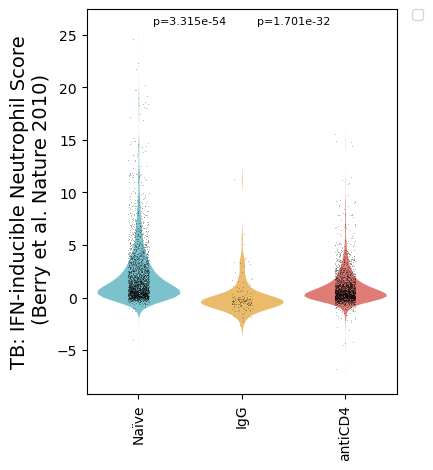

In [28]:
hue_order_Gran = ['Naïve', 'IgG', 'antiCD4']
fig, ax = plt.subplots(figsize=(4, 5))
TRM_Score['Group'] = pd.Categorical(TRM_Score['Group'], categories=hue_order_Gran, ordered=True)
sns.violinplot(y="IFN_TB_sig_conserved", x="Group",
               data=TRM_Score, orient="v", linewidth=0,
               palette=reinfection_palette, hue_order=hue_order_Gran, ax=ax)
sns.stripplot(y="IFN_TB_sig_conserved", x="Group",
              data=TRM_Score, orient="v", color='black', jitter=True, size=.5, alpha=.4, ax=ax)
naive = TRM_Score[TRM_Score['Group'] == 'Naïve']['IFN_TB_sig_conserved']
igg = TRM_Score[TRM_Score['Group'] == 'IgG']['IFN_TB_sig_conserved']
antiCD4 = TRM_Score[TRM_Score['Group'] == 'antiCD4']['IFN_TB_sig_conserved']
# Mann-Whitney U test
_, p_val_naive_igg = mannwhitneyu(naive, igg)
_, p_val_antiCD4_igg = mannwhitneyu(antiCD4, igg)

y_max = TRM_Score['IFN_TB_sig_conserved'].max()
y_offset = y_max * 0.05 
ax.text(0.5, y_max + y_offset, f'p={p_val_naive_igg:.3e}', ha='center', va='bottom', color='k', fontsize=8)
ax.text(1.5, y_max + y_offset, f'p={p_val_antiCD4_igg:.3e}', ha='center', va='bottom', color='k', fontsize=8)
ax.spines["top"].set_visible(True)
ax.spines["right"].set_visible(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.xlabel('')
plt.grid(False)
plt.ylabel("TB: IFN-inducible Neutrophil Score\n (Berry et al. Nature 2010)", fontsize=14)
plt.savefig('Figure6_IFN_inducible_Neutrophil.png', bbox_inches="tight", dpi=1000, transparent=True)
plt.show()
